<a href="https://colab.research.google.com/github/toan28102002/Project-2025-California-student-data/blob/main/Project_Spring_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import zscore

# Dataset student-mat_.csv description

In [ ]:
# Data loading
df = pd.read_csv('student-mat_.csv')

# Description of the dataset
print("Number of samples:", df.shape[0])
print("\nNumber of features:", df.shape[1] -1 )# minus 1 if target column included
print("\nFeature types:")
print(df.dtypes)

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

Number of samples: 395

Number of features: 30

Feature types:
school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime      float64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences      float64
G3            float64
dtype: object

Statistical Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  393.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.816794    2.989873    2.521519    1.448101    

#   Dataset student-mat_.csv Preprocessing

In [ ]:
print("Original Data Shape:", df.shape)

# Check for missing values
print("\nChecking for NaNs:")
print(df.isnull().sum())

# Drop rows with NaN
df = df.dropna()

print("\nData Shape after dropping nulls:", df.shape)

# Check for duplicates
# Because it don't have a primary key, I am not using Check for duplicates method if the database have specific name, address, ID, it will be better to identify
# print("\nDuplicate rows:", df.duplicated().sum())

Original Data Shape: (395, 31)

Checking for NaNs:
school        0
sex           5
age           2
address       3
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      1
G3            3
dtype: int64

Data Shape after dropping nulls: (380, 31)


In [ ]:
# Handle categorical features
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Convert categorical variables like 1 - 0
df = pd.get_dummies(df, drop_first=True)

# Clean  Dataset student-mat_.csv (Outlier Detection and Removal Method)


In [ ]:
# Outlier Detection and Removal

# IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition for IQR
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove rows with outliers based on IQR
df_no_outliers_iqr = df[~outlier_condition.any(axis=1)]

# Z-Score Method
# Calculate Z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify rows where any feature has a Z-score > 5 or < -5
outlier_condition_z = (z_scores > 5) | (z_scores < -5)

# Remove rows with outliers based on Z-score
df_no_outliers_z = df[~outlier_condition_z.any(axis=1)]

# Output results
print(f"\nOriginal Data Shape: {df.shape}")

# Get number of rows and columns after IQR outlier removal
rows_iqr, cols_iqr = df_no_outliers_iqr.shape
print(f"Rows after IQR method: {rows_iqr}, Columns: {cols_iqr}")

# Get number of rows and columns after Z-Score outlier removal
rows_z, cols_z = df_no_outliers_z.shape
print(f"Rows after Z-Score method: {rows_z}, Columns: {cols_z}") #I will choose Z method because it retains 374 rows out of 380. Instead of 60 rows out of 380


Original Data Shape: (380, 31)
Rows after IQR method: 60, Columns: 31
Rows after Z-Score method: 374, Columns: 31


#   Dataset student-mat_.csv Analysis

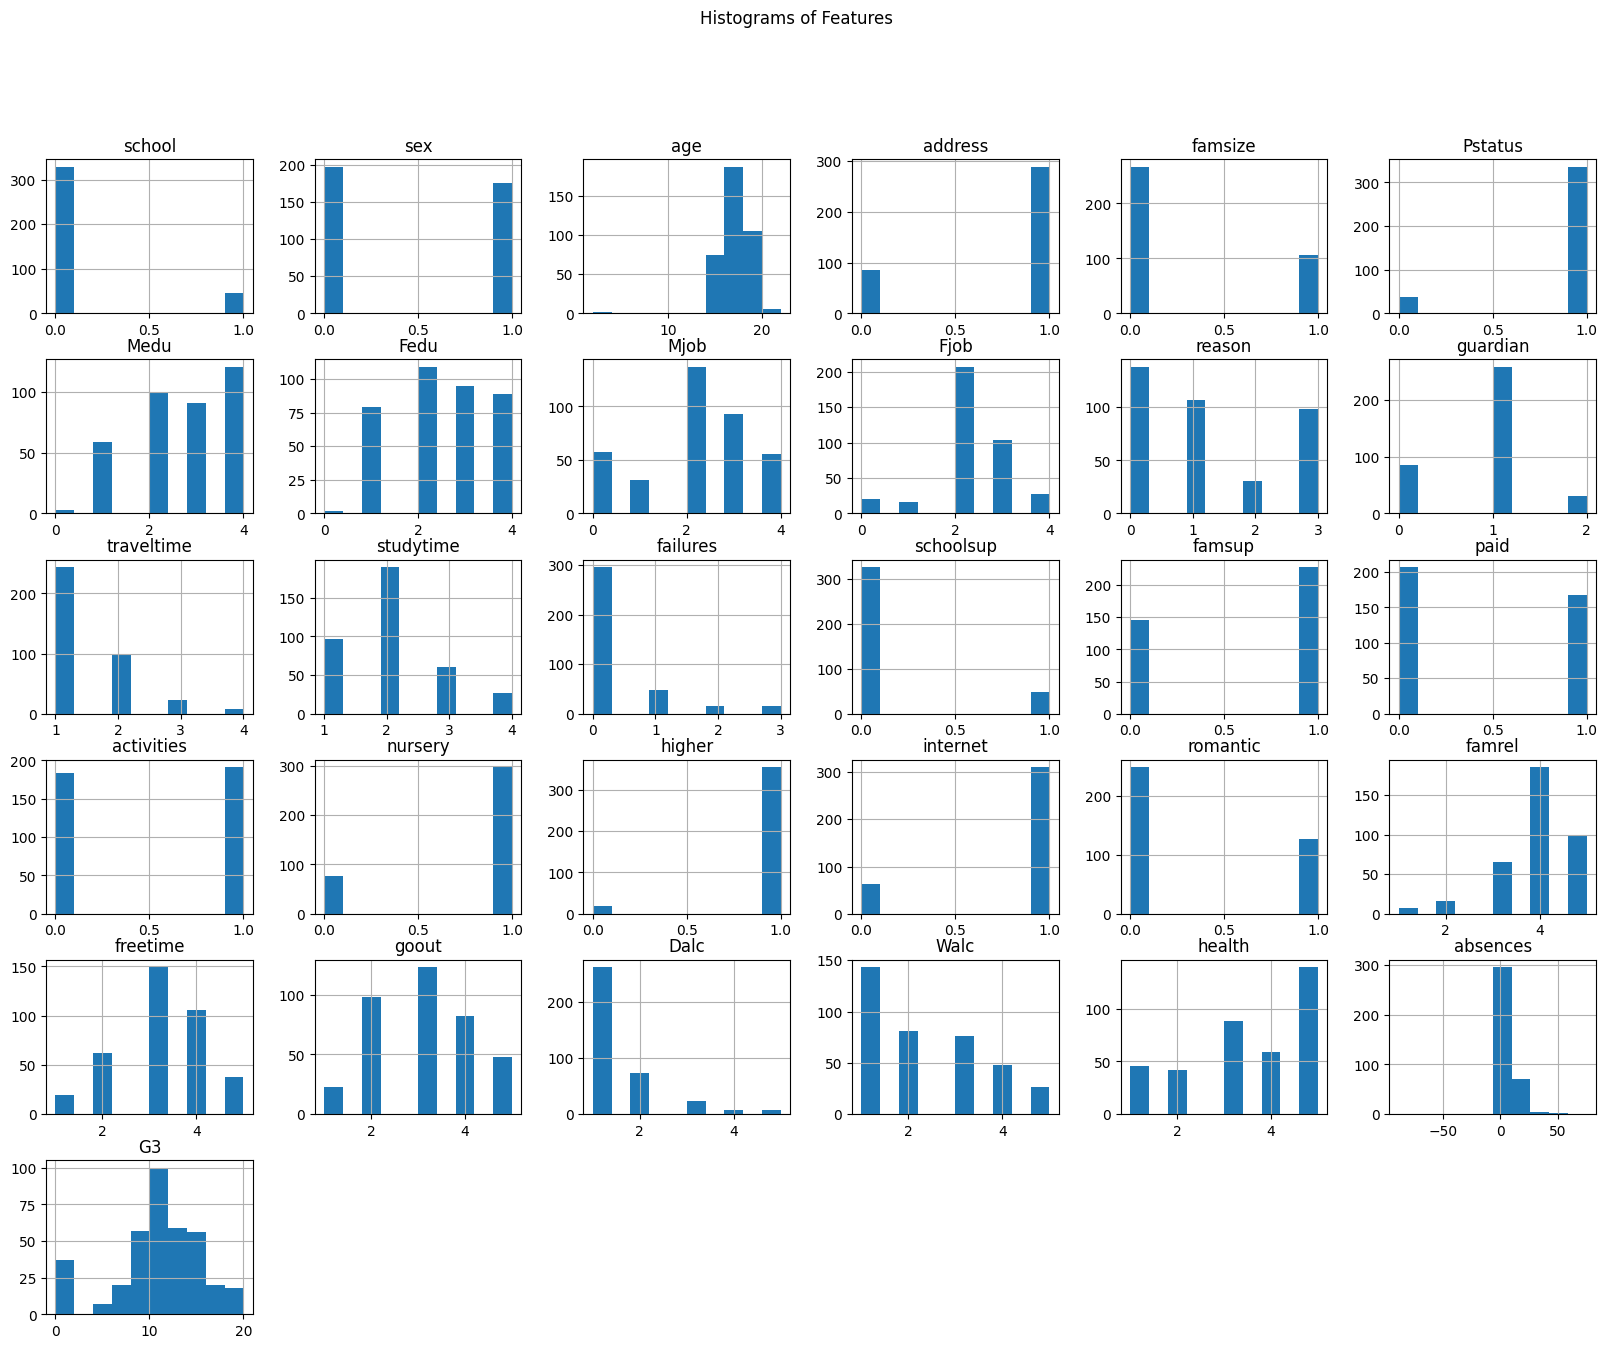

In [ ]:
# Histograms
df_no_outliers_z.hist(figsize=(20,15))
plt.suptitle('Histograms of Features')
plt.show()


#For School 0.0 mean GP and 1.0 mean MS
#For Sex 0.0 mean Female and 1.0 mean Male
#for Addess 1 mean Urban  0 mean Rural .... go on

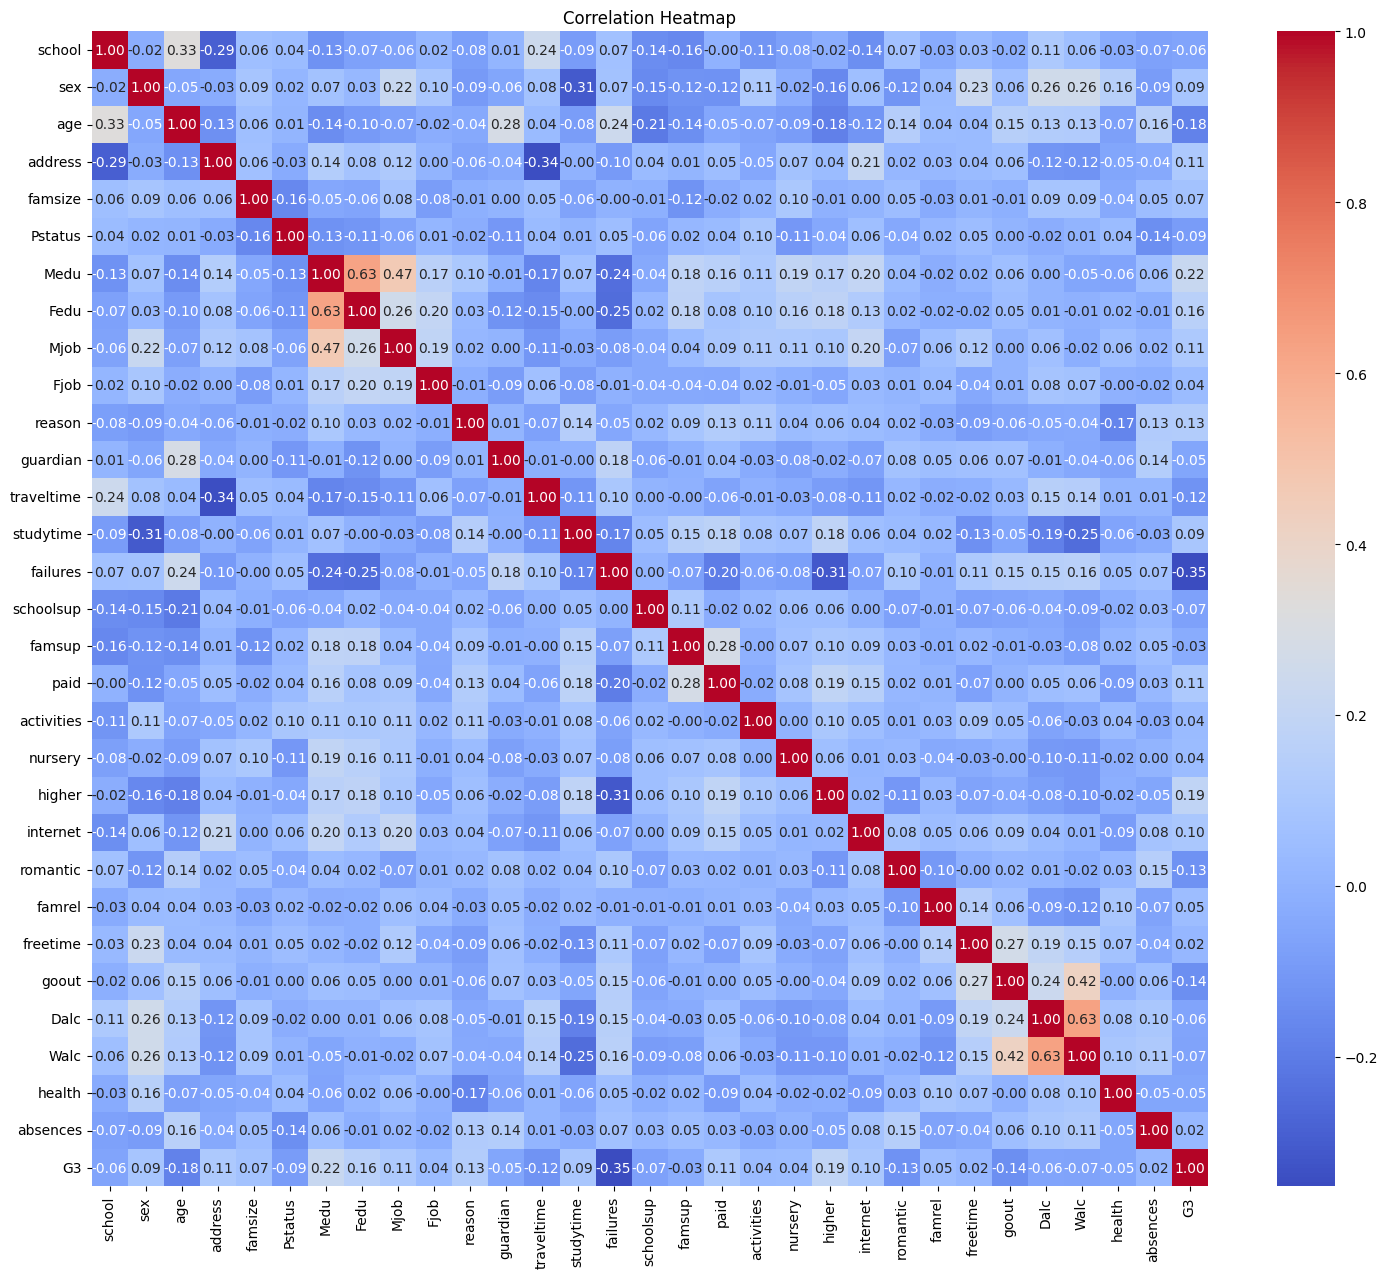

In [ ]:
# Correlation heatmap (only numeric features)
plt.figure(figsize=(18,15))
sns.heatmap(df_no_outliers_z.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#  Dataset student-mat_.csv model development

In [ ]:
# 🎯 Feature Scaling

# Separate features and target
X = df_no_outliers_z.drop('G3', axis=1)   # Features
y = df_no_outliers_z['G3']                # Target

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#This code loads a dataset, separates it into features (X) and target (y, which is the final grade G3).
#It then scales the features so that each one has a mean of 0 and a standard deviation of 1.
#This helps machine learning models treat all features equally and improves their performance.


# 🔥 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Linear Regression
RMSE: 4.48
MAE: 3.20
R^2 Score: -0.15
------------------------------


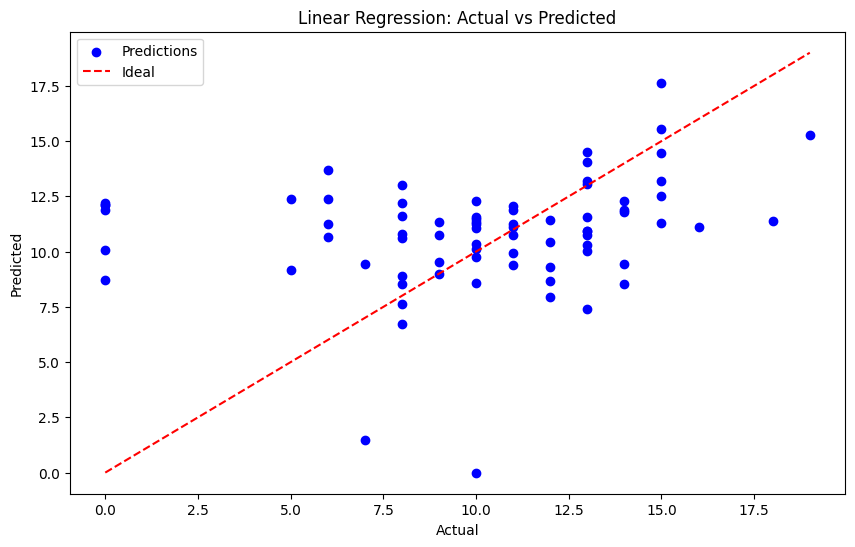

Ridge Regression
RMSE: 4.47
MAE: 3.20
R^2 Score: -0.15
------------------------------


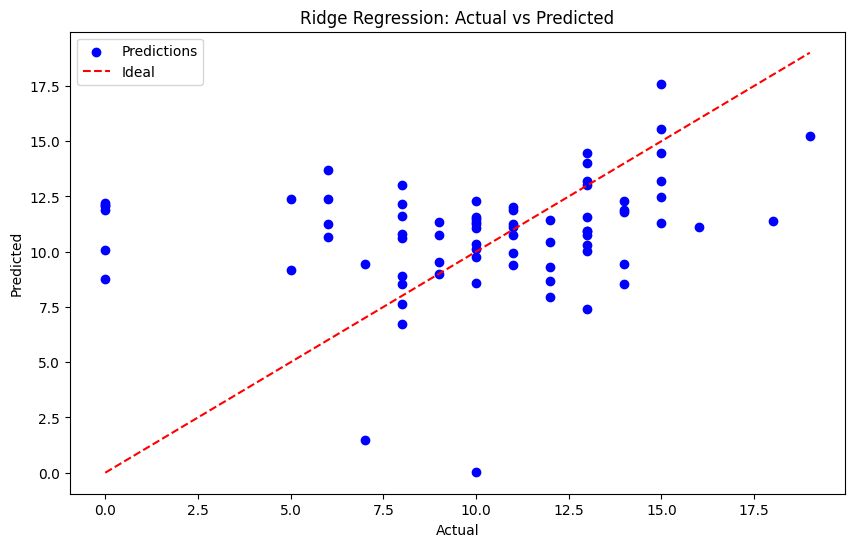

Decision Tree Regression
RMSE: 4.75
MAE: 3.10
R^2 Score: -0.29
------------------------------


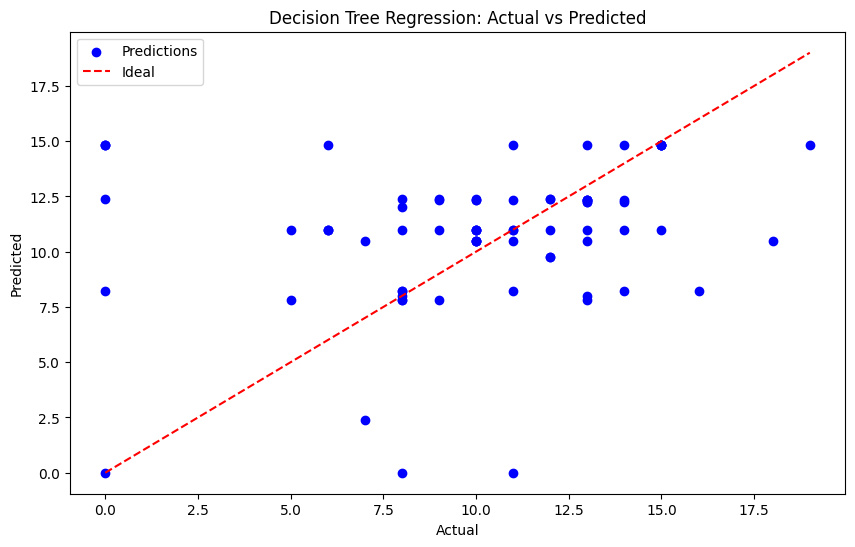

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Performance Evaluation
def regression_results(y_true, y_pred, model_name):
    # Calculate performance metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-"*30)

    # Visualizing predictions vs actual values
    plt.figure(figsize=(10,6))
    plt.scatter(y_true, y_pred, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

# Call the function for each model
regression_results(y_test, y_pred_lin, "Linear Regression")
regression_results(y_test, y_pred_ridge, "Ridge Regression")
regression_results(y_test, y_pred_tree, "Decision Tree Regression")

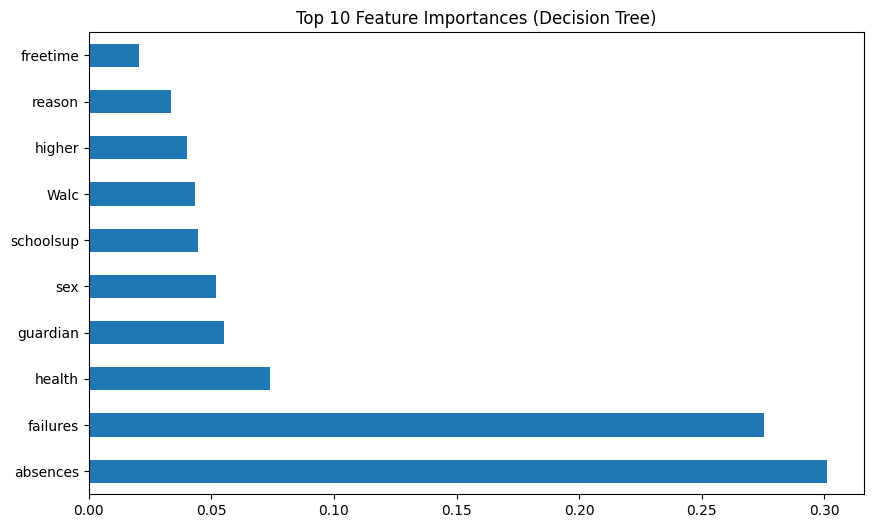

In [ ]:
# Feature importance for Tree
feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()

# Example of dataset student-mat_.csv if you don't clean the error data out

In [ ]:
def regression_results(y_true, y_pred, wrong_rmse, wrong_r2, model_name):
    # Calculate performance metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)


    # Print results with aligned formatting
    print(f"{model_name}")
    print(f"{'RMSE:':<15} {rmse:>8.2f} (Wrong: {wrong_rmse:>6.2f})")  # Aligned RMSE
    print(f"{'R^2 Score:':<15} {r2:>8.2f} (Wrong: {wrong_r2:>6.2f})")  # Aligned R^2 Score
    print("-" * 40)

# Example usage with your models and wrong values
regression_results(y_test, y_pred_lin, wrong_rmse=10.74, wrong_r2=-7.51, model_name="Linear Regression")
regression_results(y_test, y_pred_ridge, wrong_rmse=9.38, wrong_r2=-5.49, model_name="Ridge Regression")
regression_results(y_test, y_pred_tree, wrong_rmse=4.00, wrong_r2=-0.18, model_name="Decision Tree Regression")

Linear Regression
RMSE:               4.48 (Wrong:  10.74)
R^2 Score:         -0.15 (Wrong:  -7.51)
----------------------------------------
Ridge Regression
RMSE:               4.47 (Wrong:   9.38)
R^2 Score:         -0.15 (Wrong:  -5.49)
----------------------------------------
Decision Tree Regression
RMSE:               4.75 (Wrong:   4.00)
R^2 Score:         -0.29 (Wrong:  -0.18)
----------------------------------------


# Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Dataset obesity_prediction.csv

In [ ]:
# Load the dataset
df_obesity  = pd.read_csv('obesity_prediction.csv')

# Basic information
print("Number of samples:", df_obesity.shape[0])
print("Number of features:", df_obesity.shape[1] - 1)  # minus 1 if target column included
print("\nData Types:\n", df_obesity.dtypes)

print("\nStatistical Summary:")
print(df_obesity.describe())

Number of samples: 2112
Number of features: 16

Data Types:
 Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

Statistical Summary:
               Age       Height       Weight          FCVC          NCP  \
count  2112.000000  2112.000000  2112.000000   2112.000000  2112.000000   
mean     24.311255     1.701674    91.290404     26.092140     2.685610   
std       6.344766     0.093283   217.273701   1087.932843     0.777855   
min      14.000000     1.450000    39.000000      1.000000     1.000000   
25%      19.947666     1.630000    65.815202      2.000000     2.658599   
50%      22

# Data Preprocessing

In [ ]:
print("Original Data Shape:", df_obesity.shape)

# Check for null values
print("\nNull values in the dataset:")
print(df_obesity.isnull().sum())

# Drop rows with any null values
df_obesity = df_obesity.dropna()
print("\nShape after dropping nulls:", df_obesity.shape)

# Check for duplicates
# Because it don't have a primary key, I am not using Check for duplicates method if the database have specific name, address, ID, it will be better to identify
#print("\nDuplicate rows:", obesity_df.duplicated().sum())


Original Data Shape: (2112, 17)

Null values in the dataset:
Gender            0
Age               0
Height            0
Weight            0
family_history    1
FAVC              1
FCVC              0
NCP               0
CAEC              1
SMOKE             1
CH2O              1
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            1
Obesity           0
dtype: int64

Shape after dropping nulls: (2106, 17)


# Outlier Detection and Removal

In [ ]:
# Remove outliers using Z-Score method
numeric_cols = df_obesity.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df_obesity[numeric_cols]))
threshold = 3
df_obesity = df_obesity[(z_scores < threshold).all(axis=1)]
print("Shape after removing outliers using Z-Score:", df_obesity.shape)

Shape after removing outliers using Z-Score: (2079, 17)


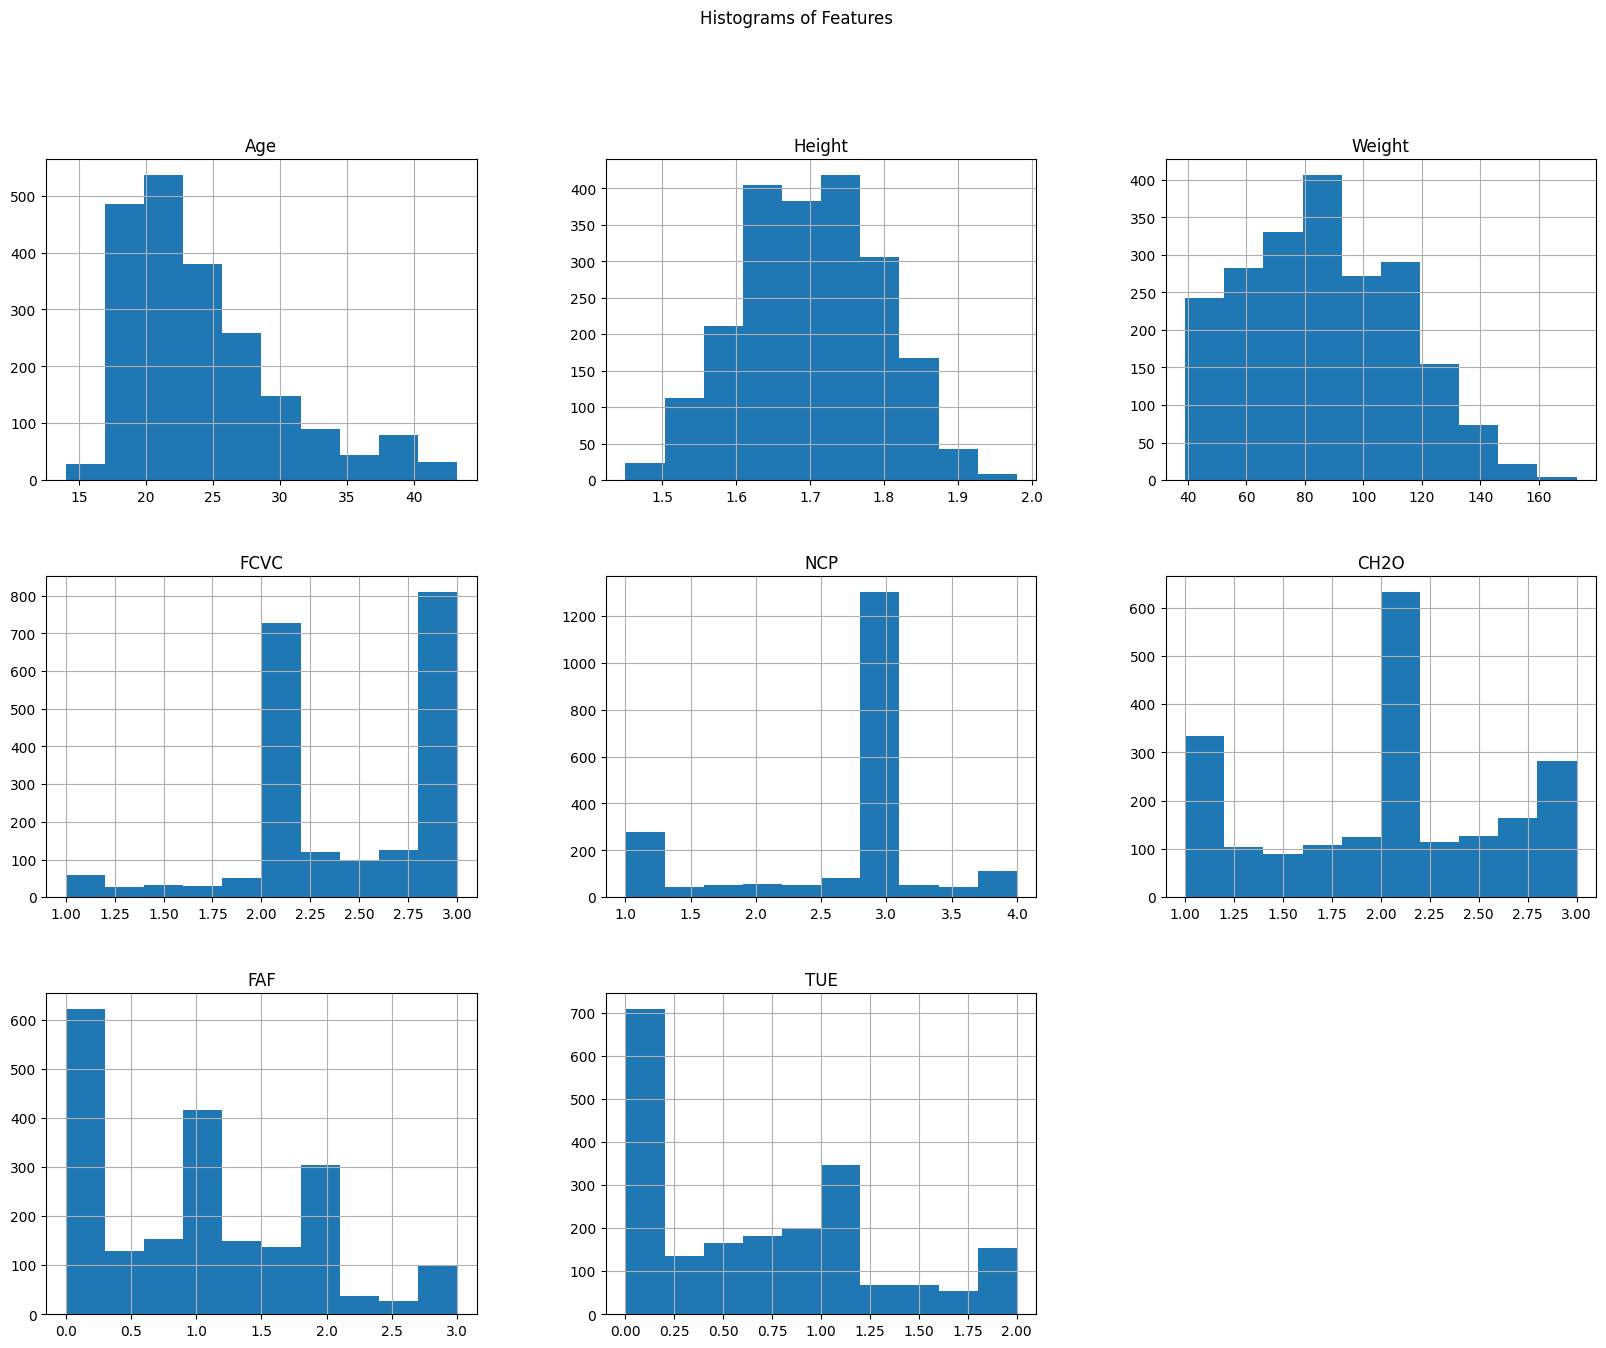

In [ ]:
# Histograms
df_obesity.hist(figsize=(20,15))
plt.suptitle('Histograms of Features')
plt.show()

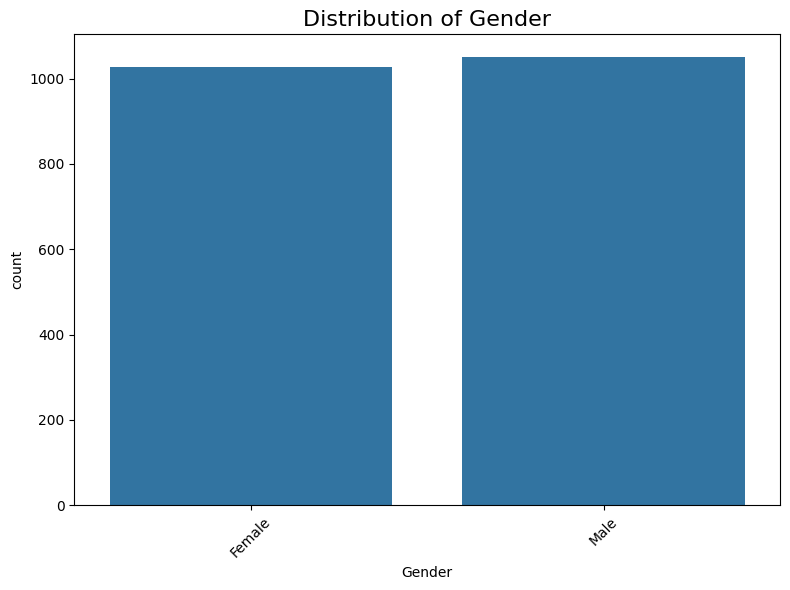

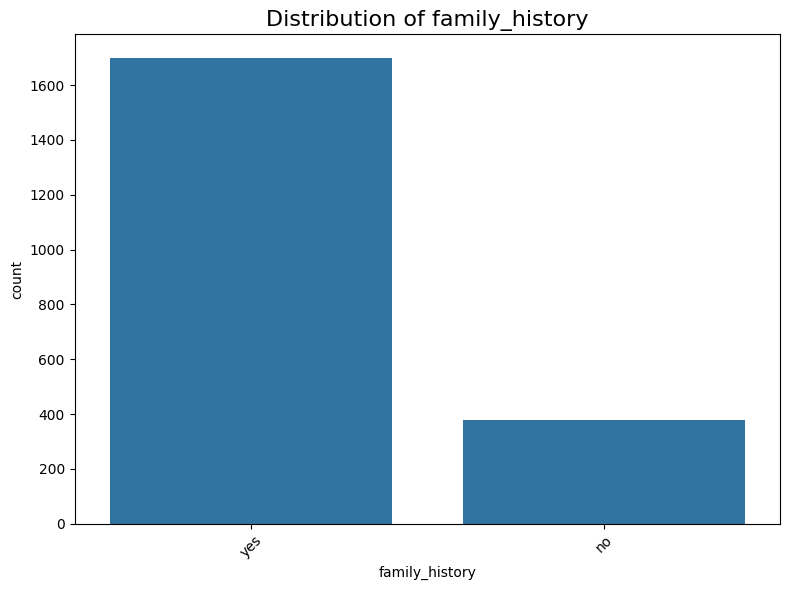

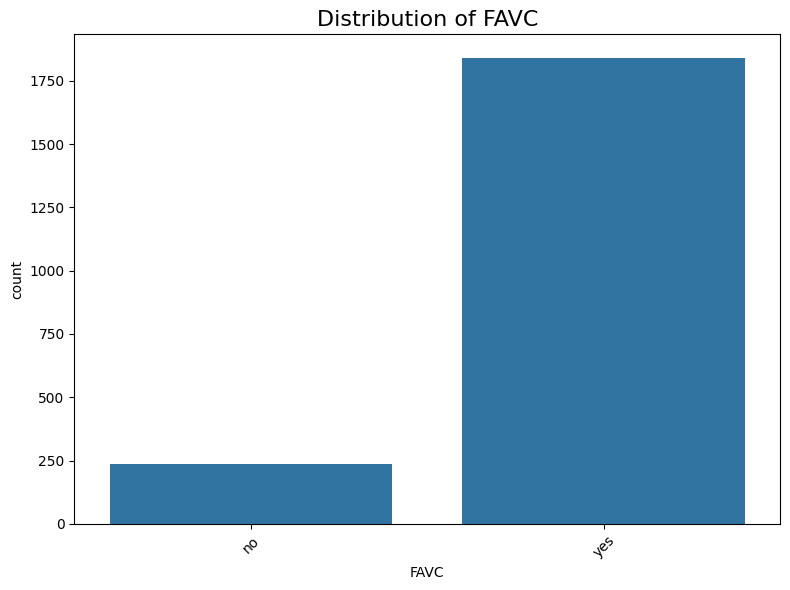

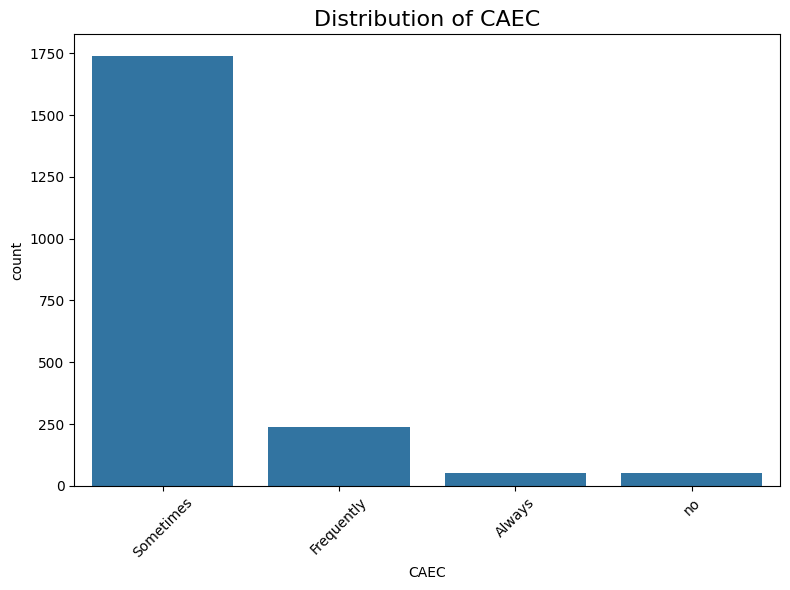

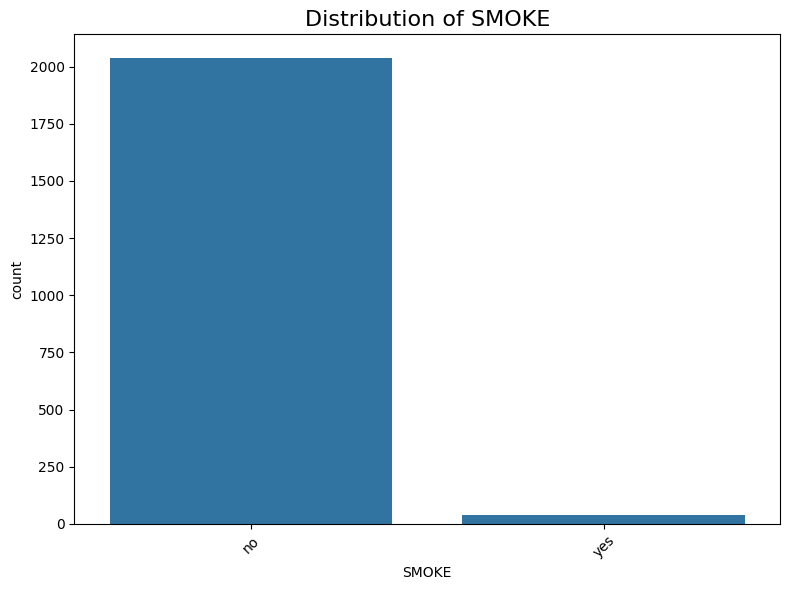

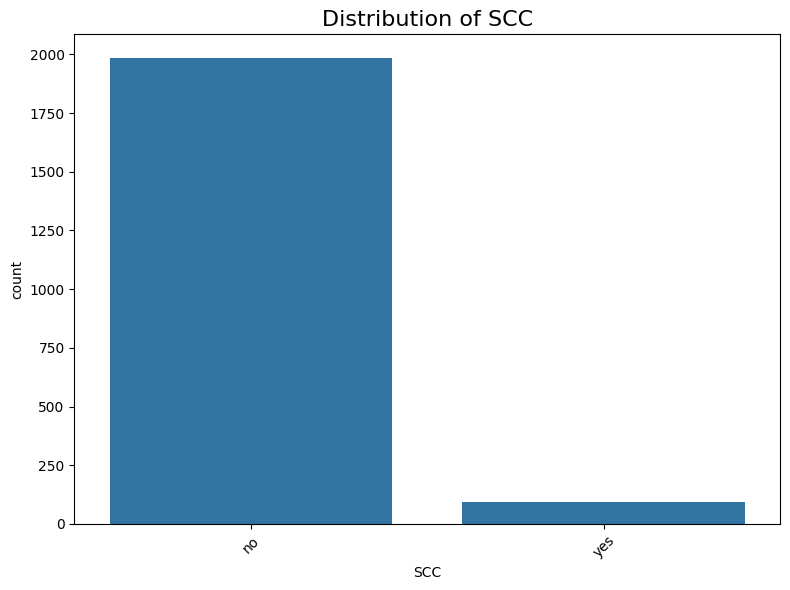

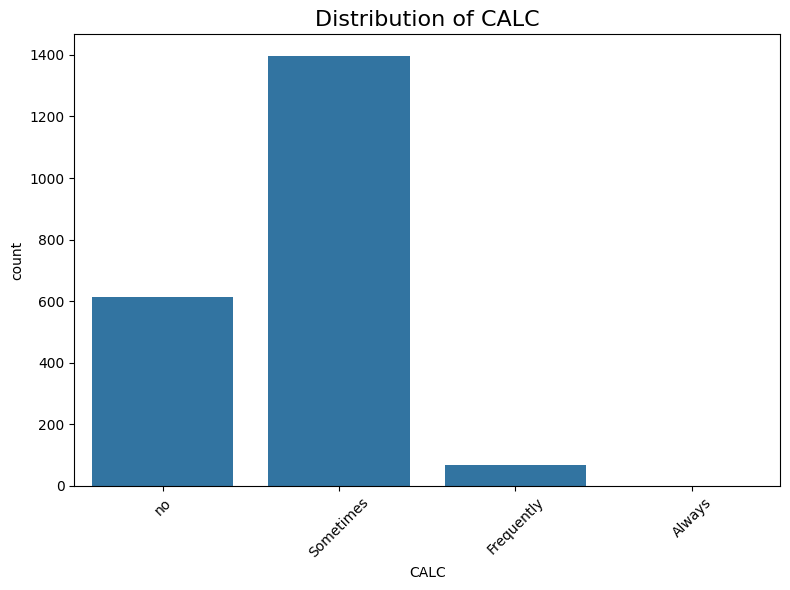

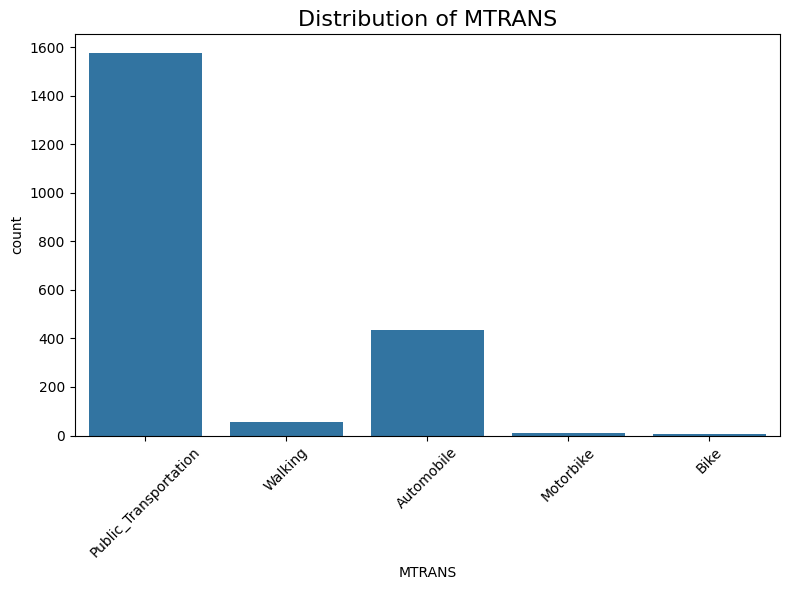

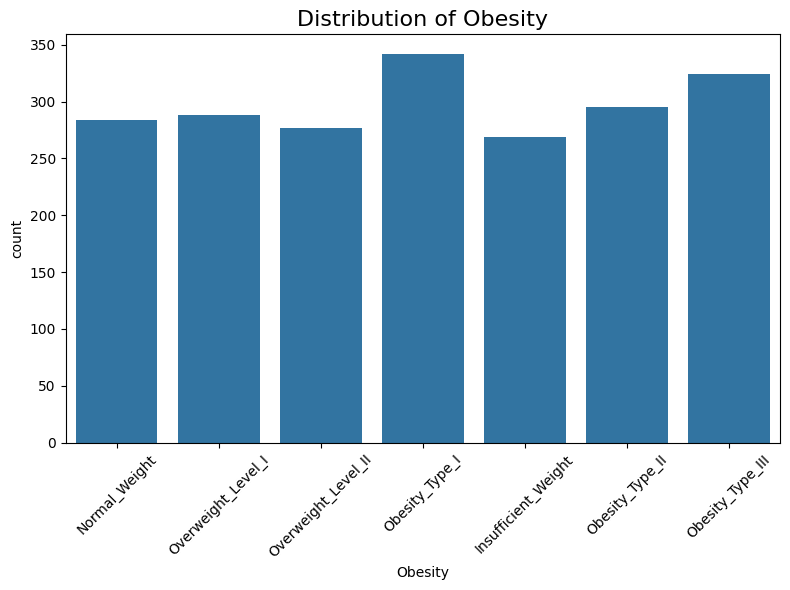

In [ ]:
#  Visualize Categorical Features (Countplots)
categorical_cols = df_obesity.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df_obesity)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


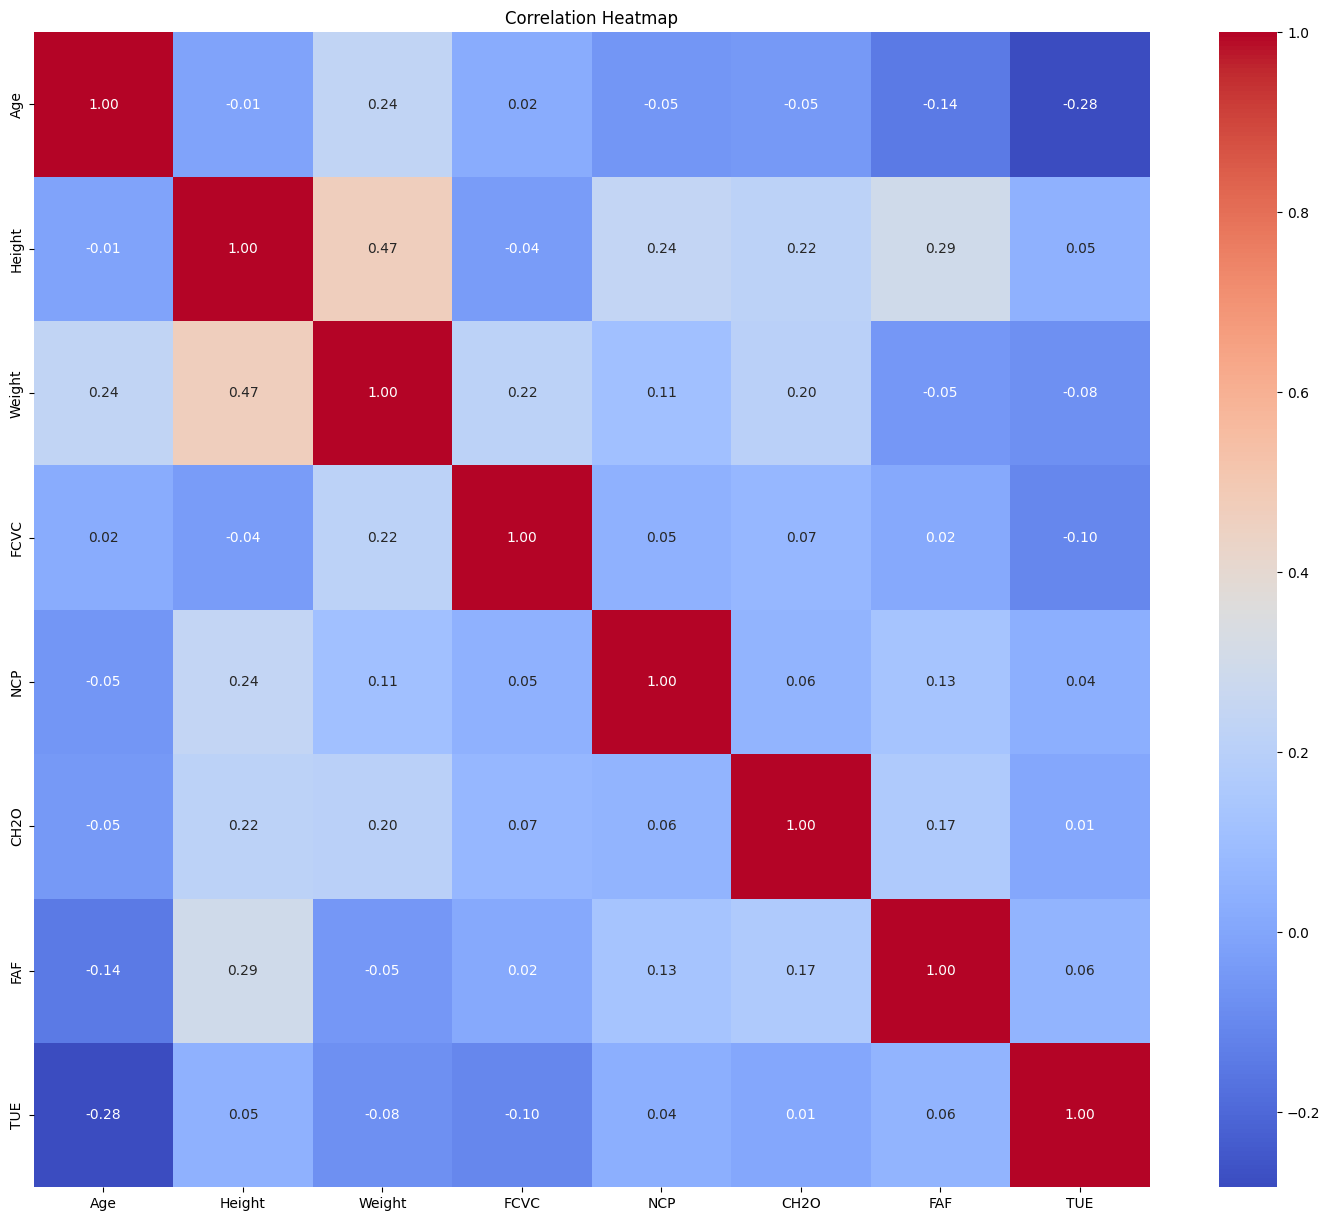

In [ ]:
# Correlation heatmap (only numeric features)
plt.figure(figsize=(18,15))
sns.heatmap(df_obesity.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Handle categorical variables
label_encoder = LabelEncoder()
for col in df_obesity.columns:
    if df_obesity[col].dtype == 'object':
        df_obesity[col] = label_encoder.fit_transform(df_obesity[col])

# Separate features and target
X_obesity = df_obesity.drop('Obesity', axis=1)  # Features
y_obesity = df_obesity['Obesity']  # Target

# Feature Scaling
scaler_obesity = StandardScaler()
X_scaled_obesity = scaler_obesity.fit_transform(X_obesity)

# Target Class Distribution Histograms

<ipython-input-57-7e913f08005b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obesity_Label', data=df_obesity, palette='Set2')  # Use countplot for categorical data


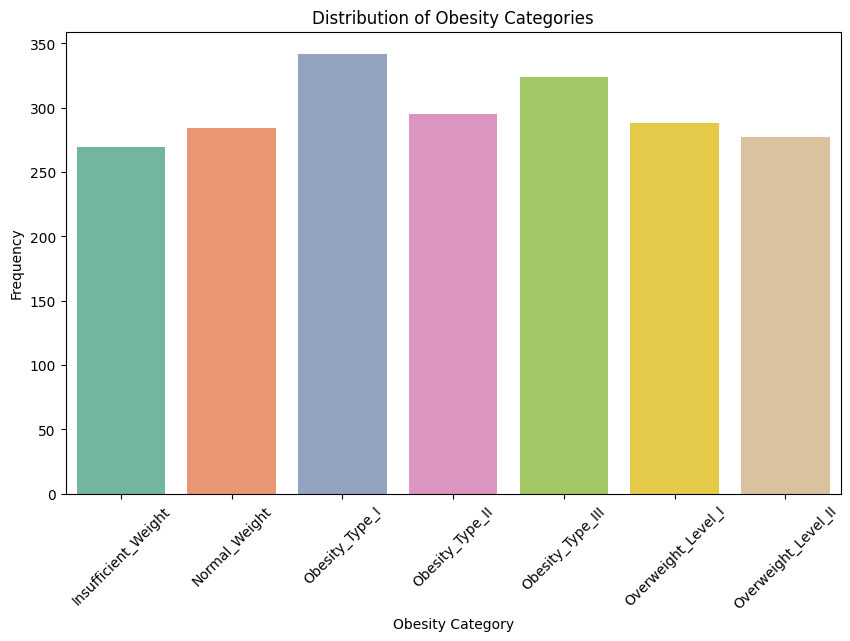

Obesity_Label
Insufficient_Weight    269
Normal_Weight          284
Obesity_Type_I         342
Obesity_Type_II        295
Obesity_Type_III       324
Overweight_Level_I     288
Overweight_Level_II    277
Name: count, dtype: int64


In [ ]:
# Define the mapping for the 'Obesity' column values
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# Create a custom ordered categorical type for the labels
ordered_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                  'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

# Map the numeric values to descriptive labels
df_obesity['Obesity_Label'] = df_obesity['Obesity'].map(obesity_mapping)

# Convert the 'Obesity_Label' column to an ordered categorical type
df_obesity['Obesity_Label'] = pd.Categorical(df_obesity['Obesity_Label'], categories=ordered_labels, ordered=True)

# Plotting the histogram based on the mapped labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity_Label', data=df_obesity, palette='Set2')  # Use countplot for categorical data
plt.title('Distribution of Obesity Categories')
plt.xlabel('Obesity Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each label and display them in the desired order
obesity_counts = df_obesity['Obesity_Label'].value_counts().reindex(ordered_labels)

# Display the counts
print(obesity_counts)


In [ ]:
# Model Development

# Train-test split
X_train_obesity, X_test_obesity, y_train_obesity, y_test_obesity = train_test_split(
    X_scaled_obesity, y_obesity, test_size=0.3, random_state=42, stratify=y_obesity
)

# Logistic Regression Model
logreg_obesity = LogisticRegression(max_iter=1000, random_state=42)
logreg_obesity.fit(X_train_obesity, y_train_obesity)
y_pred_logreg = logreg_obesity.predict(X_test_obesity)

# K-Nearest Neighbors Model
knn_obesity = KNeighborsClassifier(n_neighbors=5)  # k=5
knn_obesity.fit(X_train_obesity, y_train_obesity)
y_pred_knn = knn_obesity.predict(X_test_obesity)

In [ ]:
# Performance Evaluation

print("\nLogistic Regression Results ")
print("Accuracy:", accuracy_score(y_test_obesity, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_obesity, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_obesity, y_pred_logreg))

print("\nKNN Results")
print("Accuracy:", accuracy_score(y_test_obesity, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_obesity, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_obesity, y_pred_knn))



Logistic Regression Results 
Accuracy: 0.8733974358974359
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        81
           1       0.82      0.65      0.72        85
           2       0.94      0.91      0.93       103
           3       0.96      0.99      0.97        89
           4       1.00      0.99      0.99        97
           5       0.74      0.78      0.76        86
           6       0.76      0.80      0.78        83

    accuracy                           0.87       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.87      0.87      0.87       624

Confusion Matrix:
 [[79  2  0  0  0  0  0]
 [12 55  0  0  0 14  4]
 [ 0  0 94  3  0  1  5]
 [ 0  0  1 88  0  0  0]
 [ 0  0  0  1 96  0  0]
 [ 0  7  0  0  0 67 12]
 [ 0  3  5  0  0  9 66]]

KNN Results
Accuracy: 0.7948717948717948
Classification Report:
               precision    recall  f1-score   support

           

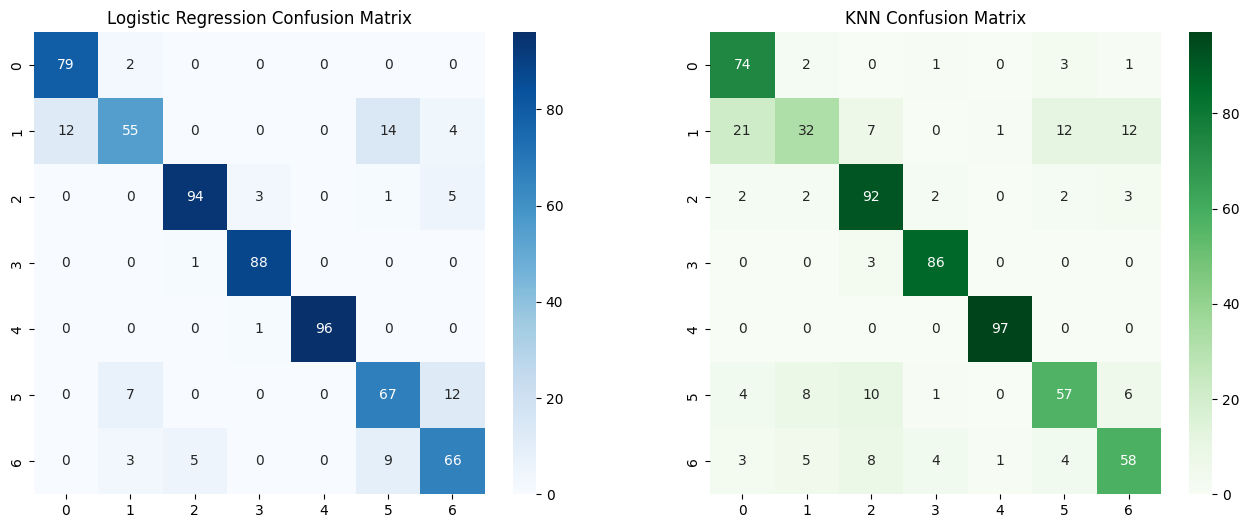

In [ ]:
# Plot confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix(y_test_obesity, y_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(confusion_matrix(y_test_obesity, y_pred_knn), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('KNN Confusion Matrix')

plt.show()


In [ ]:
# Feature Importance from Logistic Regression w
coefficients = pd.DataFrame(abs(logreg_obesity.coef_[0]), index=X_obesity.columns, columns=['Coefficient'])
print("\nFeature Importance (Logistic Regression Coefficients ):")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Feature Importance (Logistic Regression Coefficients ):
                Coefficient
Weight            11.586561
Height             2.902029
Age                0.943931
family_history     0.567839
CAEC               0.415472
FAVC               0.256607
FAF                0.171727
Gender             0.150314
MTRANS             0.146824
SMOKE              0.138984
TUE                0.113140
CH2O               0.086430
CALC               0.074425
NCP                0.046570
FCVC               0.026217
SCC                0.011407
